# Capstone Project: Gaussian Mixture Models (GMMs)
### Student: Mohammad Faridul Alam
### Course: Capstone Project – Clinical Bioinformatics
### Date: July 2025

## 1. Introduction
Gaussian Mixture Models (GMMs) are a probabilistic unsupervised learning algorithm used for clustering data into groups. Unlike k-Means which uses hard assignments, GMM provides soft probabilistic assignments allowing for more nuanced clustering.

## 2. How It Works
A GMM assumes the data is generated from a mixture of multiple Gaussian distributions, each with its own mean and covariance. It uses the Expectation-Maximization (EM) algorithm:

- **E-step**: Estimate the probability that each data point belongs to each Gaussian component.
- **M-step**: Update the component parameters (mean, covariance, mixing coefficients) based on these probabilities.

### Probability Density Function
```math
p(x) = \sum_{k=1}^K \pi_k \cdot \mathcal{N}(x \mid \mu_k, \Sigma_k)
```

## 3. Code Implementation (GMM)
This section demonstrates GMM implementation on synthetic 2D data.

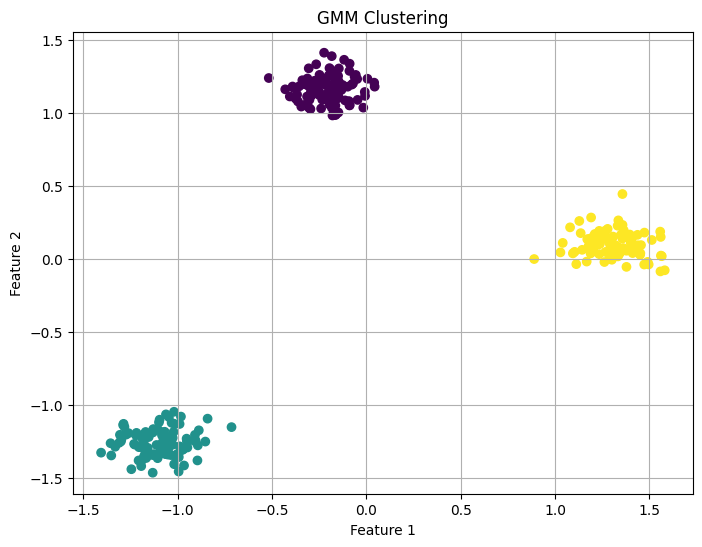

In [1]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit GMM
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)

# Plot the results
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title("GMM Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

## 4. Comparison with k-Means
To evaluate GMM, we compare it with k-Means clustering using:
- Visual cluster assignments
- Silhouette Scores

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Fit k-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Silhouette Scores
kmeans_sil = silhouette_score(X_scaled, kmeans_labels)
gmm_sil = silhouette_score(X_scaled, labels)

print(f"Silhouette Score - k-Means: {kmeans_sil:.3f}")
print(f"Silhouette Score - GMM: {gmm_sil:.3f}")

Silhouette Score - k-Means: 0.909
Silhouette Score - GMM: 0.909


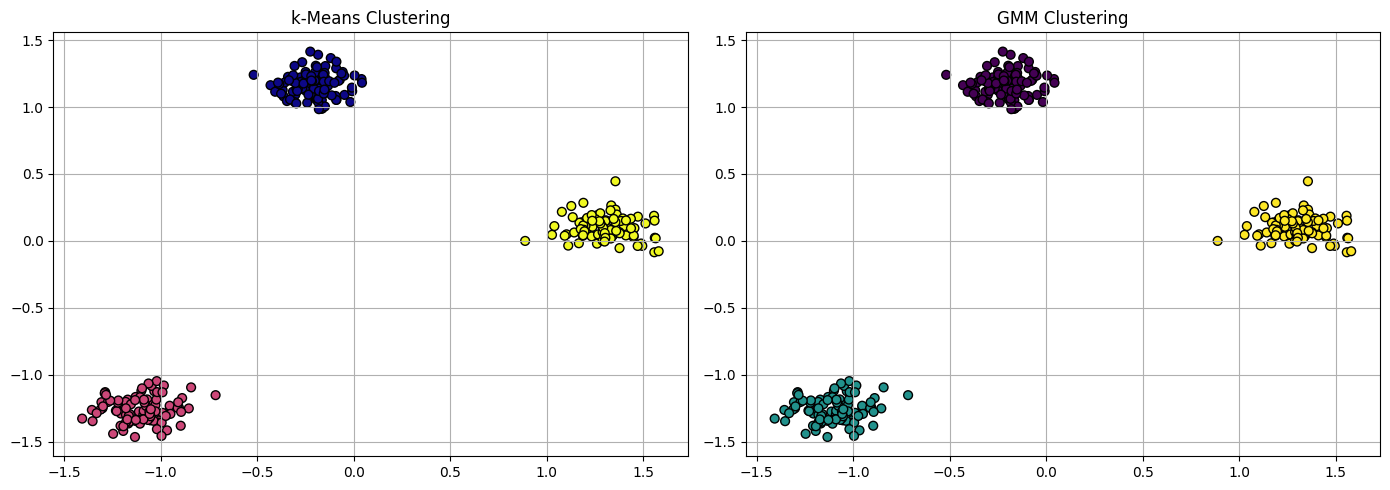

In [3]:
# Side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='plasma', edgecolor='k', s=40)
axs[0].set_title("k-Means Clustering")
axs[0].grid(True)

axs[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', edgecolor='k', s=40)
axs[1].set_title("GMM Clustering")
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Unique feature-1: Soft Clustering (Probabilistic)

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import numpy as np

# Generate and scale data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)
X_scaled = StandardScaler().fit_transform(X)

# Fit GMM
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)
probs = gmm.predict_proba(X_scaled)

# Display soft cluster memberships
print("Soft probabilities for first 5 points:")
print(np.round(probs[:5], 3))



Soft probabilities for first 5 points:
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


Gaussian Mixture Models (GMMs) assign a probability to each data point indicating its control across different clusters. Such approach enables more refined decisions when dealing with complex or overlapping data — a crucial advantage in bioinformatics and clinical applications where clear-cut boundaries rarely exist.


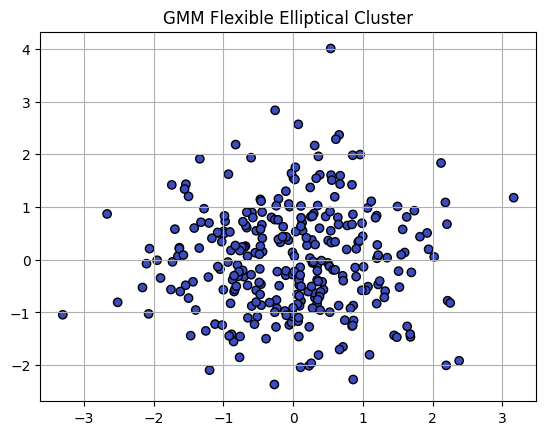

In [ ]:
# Unique feature-2: Flexible Cluster Shapes
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt

# Create elliptical-shaped data
X_ellipse, _ = make_gaussian_quantiles(cov=2.0, n_samples=300, n_features=2, n_classes=1, random_state=42)
X_scaled = StandardScaler().fit_transform(X_ellipse)

# Fit GMM
gmm = GaussianMixture(n_components=1, covariance_type='full')
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)

# Visualize
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='coolwarm', edgecolor='k')
plt.title("GMM Flexible Elliptical Cluster")
plt.grid(True)
plt.show()



In [ ]:
# Unique feature-3: Grounded in Probability (Log-Likelihood)
# Show log-likelihood of the fitted model
log_likelihood = gmm.score(X_scaled)
print(f"Log-Likelihood of the fitted GMM: {log_likelihood:.2f}")



Log-Likelihood of the fitted GMM: -2.84


In [ ]:
# Unique feature-4: Handles Real-World Uncertainty (Overlapping Clusters)
# Create overlapping blobs
X_overlap, _ = make_blobs(n_samples=300, centers=[[0, 0], [1, 1]], cluster_std=1.0, random_state=42)
X_overlap = StandardScaler().fit_transform(X_overlap)

# Fit GMM
gmm_overlap = GaussianMixture(n_components=2, random_state=42)
gmm_overlap.fit(X_overlap)
probs_overlap = gmm_overlap.predict_proba(X_overlap)

# Display soft labels
print("Soft assignments (overlap case) for first 5 points:")
print(np.round(probs_overlap[:5], 3))



Soft assignments (overlap case) for first 5 points:
[[0.119 0.881]
 [0.123 0.877]
 [0.947 0.053]
 [0.117 0.883]
 [0.054 0.946]]


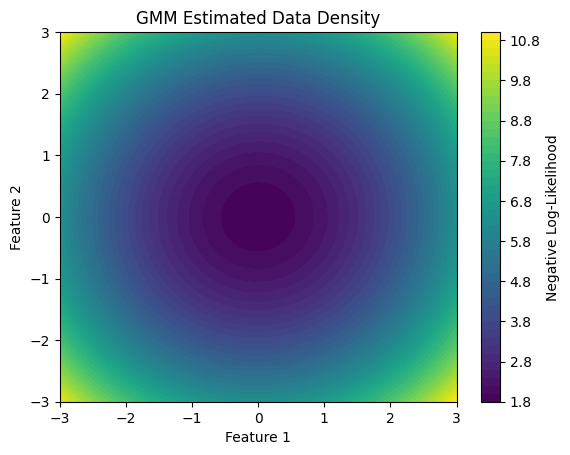

In [ ]:
# Unique feature-5: Combines Clustering and Density Estimation
from matplotlib import cm
import numpy as np

# Create grid and estimate log-likelihoods
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
Xgrid, Ygrid = np.meshgrid(x, y)
grid = np.column_stack([Xgrid.ravel(), Ygrid.ravel()])

Z = -gmm.score_samples(grid).reshape(Xgrid.shape)

# Plot negative log-likelihood as density
plt.contourf(Xgrid, Ygrid, Z, levels=50, cmap=cm.viridis)
plt.title("GMM Estimated Data Density")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Negative Log-Likelihood')
plt.show()

